### Feature Engineering Techniques: Transformations

This is the fourth notebook in a series of hands-on methods of [feature engineering techniques](https://heartbeat.fritz.ai/hands-on-with-feature-engineering-techniques-variables-types-b2120e534680)

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [5]:
wind_farm_data = pd.read_csv("data/windfarm_data.csv", index_col="year_month_day")
wind_farm_data.head(2)

,temperature_00,wind_direction_00,wind_speed_00,temperature_08,wind_direction_08,wind_speed_08,temperature_16,wind_direction_16,wind_speed_16,power
year_month_day,,,,,,,,,,
2014-01-01,4.702022,106.742590,4.743292,7.189482,100.41638,6.593833,8.172301,99.28800,5.967206,1959.3535
2014-01-02,7.695733,98.036705,6.142716,9.977118,94.03181,4.383676,9.690135,204.25444,1.696528,1266.6239


For each independent variable, check for variable normal distribution 

Independent Variable: temperature_00


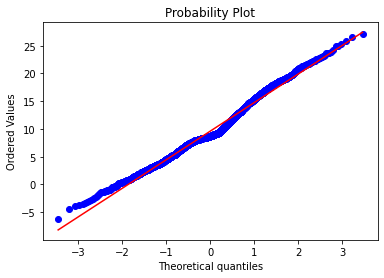

Independent Variable: wind_direction_00


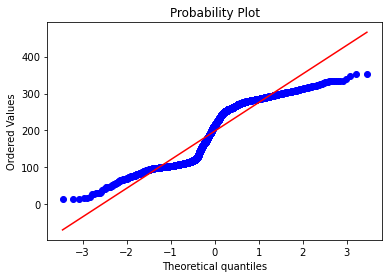

Independent Variable: wind_speed_00


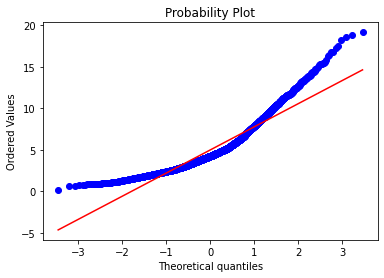

Independent Variable: temperature_08


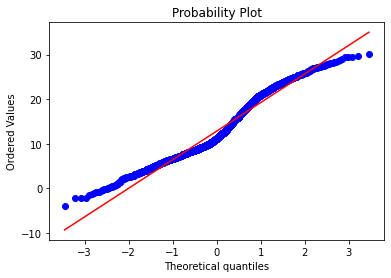

Independent Variable: wind_direction_08


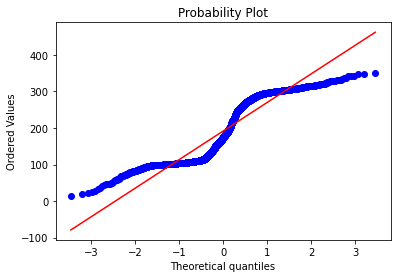

Independent Variable: wind_speed_08


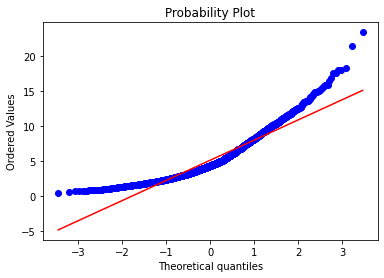

Independent Variable: temperature_16


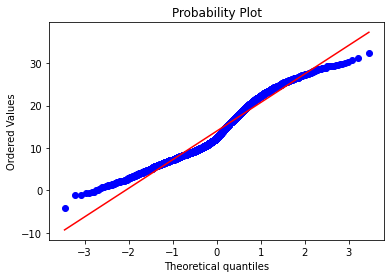

Independent Variable: wind_direction_16


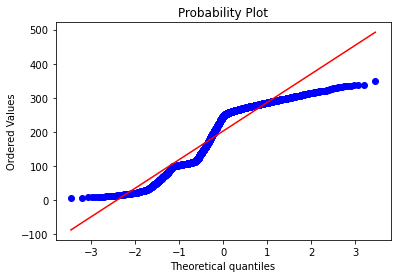

Independent Variable: wind_speed_16


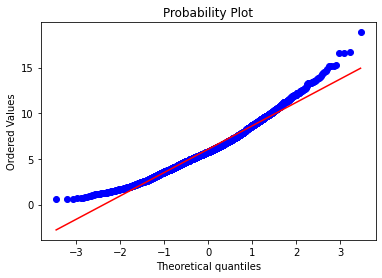

In [11]:
columns = wind_farm_data.columns
for col in columns[:-1]:
    stats.probplot(wind_farm_data[col], dist="norm", plot=plt)
    print(f"Independent Variable: {col}")
    plt.show()

The most commonly-used methods to transform variables are the following:

 * Logarithmic transformation
 * Square root transformation
 * Reciprocal transformation
 * Exponential or power transformation
 * Box-Cox transformation
 * Yeo-Johnson transformation


### Logarithmic transformation

In [20]:
## transform the wind_direction_xx 
cols = [col for col in wind_farm_data.columns if col.startswith("wind_direction")]
cols

['wind_direction_00', 'wind_direction_08', 'wind_direction_16']

In [21]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

In [26]:
# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.log, validate=True)

# apply the transformation to your data
log_wind_farm_data = logarithm_transformer.transform(wind_farm_data[cols])
log_wind_farm_data[:3]

array([[4.67042024, 4.60932534, 4.59802472],
       [4.58534195, 4.54363313, 5.31936647],
       [5.61335144, 5.4925495 , 5.52253354]])

### Square root transformation


In [28]:
# create the function transformer object with square root transformation
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation to your data
log_wind_farm_data = sqrt_transformer.transform(wind_farm_data[cols])
log_wind_farm_data[:3]

array([[10.33163056, 10.02079737,  9.96433641],
       [ 9.90134865,  9.69700005, 14.29176126],
       [16.55479387, 15.58446759, 15.81987042]])

### Reciprocal transformation

In [29]:
# create the function transformer object with reciprocal transformation
reciprocal_transformer = FunctionTransformer(np.reciprocal, validate=True)

# apply the transformation to your data
sqrt_wind_farm_data = reciprocal_transformer.transform(wind_farm_data[cols])
sqrt_wind_farm_data[:3]                                        

array([[0.00936833, 0.00995853, 0.01007171],
       [0.01020026, 0.0106347 , 0.00489585],
       [0.00364882, 0.00411733, 0.00399571]])

### Box-Cox Transformation

This is the best transformation as it evolves from exponentional transformation and computes the best lamda

In [34]:
from sklearn.preprocessing import PowerTransformer

# create the power transformer object with method 'box-cox'
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
boxcox_transformer.fit_transform(wind_farm_data[cols])
boxcox_wind_farm_data[:3]

array([[ 59.17691491,  11.18439883, 207.75206658],
       [ 55.00933108,  10.87176676, 495.33779777],
       [132.20155418,  16.14415379, 632.49736189]])